## Title: Profile of Census Tracts Along AC Transit 51A
#### Description: AC Transit 51A runs through several tracts in Oakland and Alameda, California. This file features Plotly stacked bar graphs using Census variables relating to demographics, housing, and transportation characteristics of these tracts.
#### Author: Purva Kapshikar

In [1]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

### Reading in data

In [2]:
data = pd.read_csv("tracts_data_51a.csv")

In [3]:
data["FIPS"].dtype

dtype('int64')

### Join to CSV with geometry column

In [4]:
geom_data = pd.read_csv("tracts_51A.csv")

In [33]:
geom_data = geom_data.rename(columns={"GEOID": "FIPS"})
geom_data = geom_data.loc[:, ["FIPS", "geometry"]]

In [34]:
geom_data["FIPS"].dtype

dtype('int64')

Since both "FIPS" codes in the two dataframes are the same data type, we can merge the geometry column from the `geom_data` table to the initial `data`.

In [35]:
joined_data = data.merge(right=geom_data, on="FIPS")
joined_data.head()

FIPS                                Qualifying Name  \
0  6001400200  Census Tract 4002, Alameda County, California   
1  6001400300  Census Tract 4003, Alameda County, California   
2  6001400400  Census Tract 4004, Alameda County, California   
3  6001401100  Census Tract 4011, Alameda County, California   
4  6001401200  Census Tract 4012, Alameda County, California   

  File identification State Postal Abbreviation  Summary Level  \
0               ACSSF                        ca            140   
1               ACSSF                        ca            140   
2               ACSSF                        ca            140   
3               ACSSF                        ca            140   
4               ACSSF                        ca            140   

   Geographic Component  Logical Record Number  State (FIPS Code)  \
0                     0                   2819                  6   
1                     0                   2820                  6   
2                     0                   2821                  6   
3                     0                   2828                  6   
4                     0                   2829                  6   

   County of current residence  Census Tract  ...  \
0                            1        400200  ...   
1                            1        400300  ...   
2                            1        400400  ...   
3                            1        401100  ...   
4                            1        401200  ...   

  Total Population: Female: 15 to 17 Years  \
0                                       39   
1                                       29   
2                                       22   
3                                        0   
4                                        1   

  Total Population: Female: 18 to 24 Years  \
0                                       34   
1                                       73   
2                                      100   
3                                      279   
4                                       70   

   Total Population: Female: 25 to 34 Years  \
0                                       191   
1                                       614   
2                                       588   
3                                       900   
4                                       441   

   Total Population: Female: 35 to 44 Years  \
0                                       122   
1                                       303   
2                                       386   
3                                       398   
4                                       241   

   Total Population: Female: 45 to 54 Years  \
0                                       147   
1                                       517   
2                                       311   
3                                       473   
4                                       203   

   Total Population: Female: 55 to 64 Years  \
0                                        98   
1                                       167   
2                                       224   
3                                        77   
4                                       211   

   Total Population: Female: 65 to 74 Years  \
0                                       146   
1                                       402   
2                                       241   
3                                       139   
4                                        70   

   Total Population: Female: 75 to 84 Years  \
0                                        88   
1                                        90   
2                                        79   
3                                        43   
4                                        34   

   Total Population: Female: 85 Years and Over  \
0                                            6   
1                                          177   
2                                           38   
3                                        

We first make the `joined_data` dataframe into a geodataframe.

In [36]:
joined_data['geometry'] = gpd.GeoSeries.from_wkt(joined_data['geometry'])
geo_df = gpd.GeoDataFrame(joined_data, geometry='geometry')

### Stacked bar chart

#### Mode Share

I updated the headers for the mode share variables as they were very long.

In [52]:
modes = ["Car, Truck, or Van", "Drove Alone", "Carpooled", "Public Transportation (Includes Taxicab)", "Motorcycle", "Bicycle", "Walked", "Other Means"]

for i in range(8):
    geo_df = geo_df.rename(columns={"Workers 16 Years and Over: " + modes[i]: modes[i]})

I filtered out the 10 tracts that had the highest public transit ridership.

In [97]:
top_transit_tracts = geo_df.sort_values(by="Public Transportation (Includes Taxicab)", ascending = False).head(10)

I converted this dataframe to be in a long dataframe format.

In [98]:
transpo_long = pd.melt(top_transit_tracts, id_vars='Census Tract', value_vars=modes)

In [94]:
transpo_long["Census Tract"] = transpo_long["Census Tract"].astype(str)

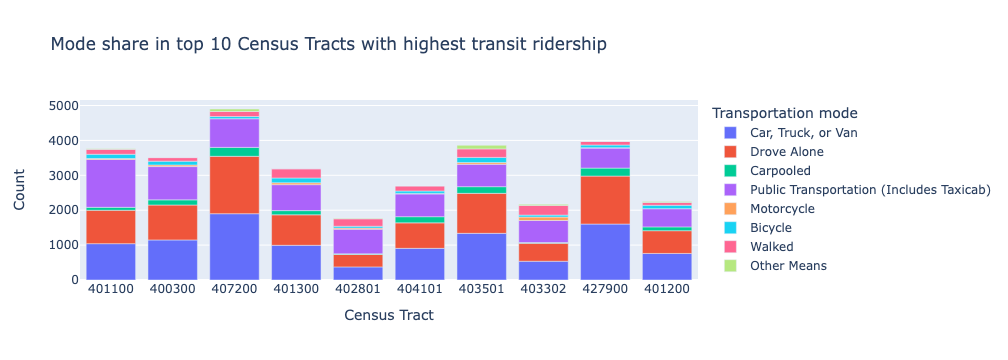

In [95]:
fig = px.bar(transpo_long, x="Census Tract", y="value", color="variable", 
            labels={
                     "value": "Count",
                     "variable": "Transportation mode",
                 },
                title="Mode share in top 10 Census Tracts with highest transit ridership")

fig.show()

#### Vehicles Available

I updated the headers for the vehicle count variables as they were very long.

In [82]:
vehicle_counts = ["None", "1", "2", "3", "4", "5"]

for i in range(6):
    geo_df = geo_df.rename(columns={"Renter-Occupied Housing Units: " + vehicle_counts[i]: vehicle_counts[i]})

I filtered out the top 10 tracts that have the most zero-car households.

In [87]:
top_zero_car_tracts = geo_df.sort_values(by="No Vehicle Available", ascending = False).head(5)
top_zero_car_tracts = top_zero_car_tracts.rename(columns={'No Vehicle Available':'None','1 Vehicle Available': '1','2 Vehicles Available':'2','3 Vehicles Available':'3','4 Vehicles Available':'4','5 or More Vehicles Available':'5'})

In [113]:
top_zero_car_tracts['Area Name'] = top_zero_car_tracts['Area Name'].str.replace("Census Tract ", "")

In [114]:
top_zero_car_tracts

FIPS                                   Qualifying Name  \
13  6001403401  Census Tract 4034.01, Alameda County, California   
15  6001403501  Census Tract 4035.01, Alameda County, California   
5   6001401300     Census Tract 4013, Alameda County, California   
6   6001402801  Census Tract 4028.01, Alameda County, California   
8   6001402900     Census Tract 4029, Alameda County, California   

   File identification State Postal Abbreviation  Summary Level  \
13               ACSSF                        ca            140   
15               ACSSF                        ca            140   
5                ACSSF                        ca            140   
6                ACSSF                        ca            140   
8                ACSSF                        ca            140   

    Geographic Component  Logical Record Number  State (FIPS Code)  \
13                     0                   2848                  6   
15                     0                   2850                  6   
5                      0                   2830                  6   
6                      0                   2841                  6   
8                      0                   2843                  6   

    County of current residence  Census Tract  ...  \
13                            1        403401  ...   
15                            1        403501  ...   
5                             1        401300  ...   
6                             1        402801  ...   
8                             1        402900  ...   

   Total Population: Female: 15 to 17 Years  \
13                                        0   
15                                        0   
5                                        14   
6                                         0   
8                                         0   

   Total Population: Female: 18 to 24 Years  \
13                                       60   
15                                      177   
5                                       131   
6                                        12   
8                                        53   

    Total Population: Female: 25 to 34 Years  \
13                                       410   
15                                       830   
5                                        749   
6                                        489   
8                                        327   

    Total Population: Female: 35 to 44 Years  \
13                                       165   
15                                       271   
5                                        409   
6                                        111   
8                                         83   

    Total Population: Female: 45 to 54 Years  \
13                                        55   
15                                       184   
5                                        185   
6                                         86   
8                                         31   

    Total Population: Female: 55 to 64 Years  \
13                                       164   
15                                       189   
5                                        154   
6                                        136   
8                                         19   

    Total Population: Female: 65 to 74 Years  \
13                                       125   
15                                       284   
5                                         66   
6                                         98   
8                                         93   

    Total Population: Female: 75 to 84 Years  \
13                                       177   
15                                       211   
5                                         57   
6                                         41   
8                                         90   

    Total Population: Female: 85 Years and Over  \
13                                          225   
15                                          110   

I converted this dataframe to be in a long dataframe format.

In [115]:
vehicles_long = pd.melt(top_zero_car_tracts, id_vars='Area Name', value_vars=vehicle_counts[0:5])

In [116]:
vehicles_long["Area Name"] = vehicles_long["Area Name"].astype(str)

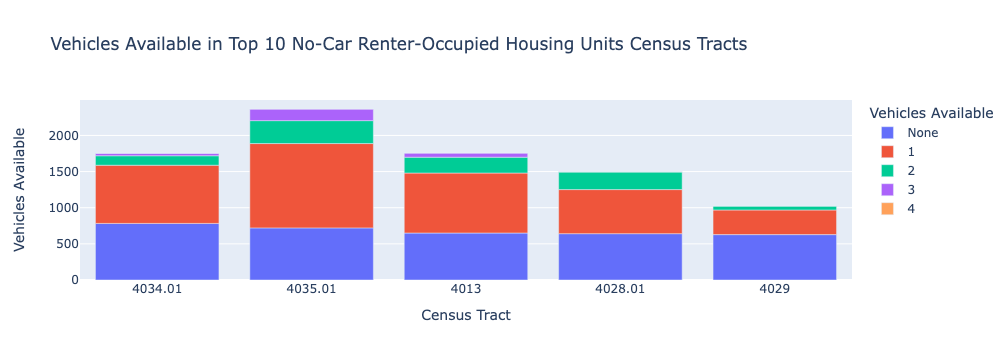

In [118]:
fig = px.bar(vehicles_long, x="Area Name", y="value", color="variable", 
            labels={
                     "value": "Vehicles Available",
                     "variable": "Vehicles Available",
                 },
                title="Vehicles Available in Top 10 No-Car Renter-Occupied Housing Units Census Tracts")

fig.update_layout(
    xaxis_title="Census Tract")
fig.show()

#### Income

I updated the headers for the income variables as they were very long.

In [19]:
income_brackets = ["Less than $10,000", "$10,000 to $14,999", "$15,000 to $19,999", "$20,000 to $24,999", "$25,000 to $29,999", "$30,000 to $34,999", "$35,000 to $39,999", "$40,000 to $44,999", "$50,000 to $59,999", "$60,000 to $74,999", "$75,000 to $99,999", "$100,000 to $124,999", "$125,000 to $149,999", "$150,000 to $199,999", "$200,000 or More"]

for i in range(15):
    geo_df = geo_df.rename(columns={"Households: " + income_brackets[i]: income_brackets[i]})

I filtered out the top 10 tracts that have the most households with incomes less than $10000.

In [20]:
most_low_income_tracts = geo_df.sort_values(by="Less than $10,000", ascending = False).head(10)

I converted this dataframe to be in a long dataframe format.

In [21]:
income_long = pd.melt(most_low_income_tracts, id_vars='Census Tract', value_vars=income_brackets)

In [22]:
income_long["Census Tract"] = income_long["Census Tract"].astype(str)

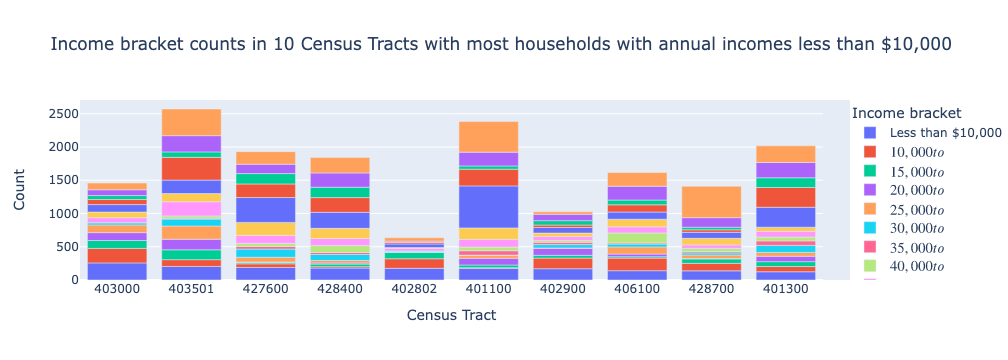

In [23]:
fig = px.bar(income_long, x="Census Tract", y="value", color="variable", 
            labels={
                     "value": "Count",
                     "variable": "Income bracket",
                 },
                title="Income bracket counts in 10 Census Tracts with most households with annual incomes less than $10,000")

fig.show()

In [24]:
fig.write_image("images/fig1.png")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
